In [2]:
import cv2

In [3]:
vidcap = cv2.VideoCapture('D:/source.avi')
success,image = vidcap.read()
vidcap2 = cv2.VideoCapture('D:/jpeg2000.mxf')
success2,image2 = vidcap2.read()
count = 0
count2 = 0
while success or success2:
    if success:
        cv2.imwrite("D:/frames1/frame%d.jpg" % count, image)     # save frame as JPEG file      
        success,image = vidcap.read()
        print('Read a new frame: ', success)
        count += 1
    if success2:
        cv2.imwrite("D:/frames2/frame%d.jpg" % count, image2)     # save frame as JPEG file      
        success2,image2 = vidcap2.read()  
        count2 += 1


Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


KeyboardInterrupt: 

In [5]:
import glob
count = 1517
count2 = 1517
images = [cv2.imread(file) for file in glob.glob("D:/frames1/*.jpg")]
images2 = [cv2.imread(file) for file in glob.glob("D:/frames2/*.jpg")]
images_yuv = images
images_yuv2 = images2
for i in range(0, count-1):
    images_yuv[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2YUV) # images[i].convert('YCbCr')
    print(i)
print(len(images_yuv))
for i in range(0, count2-1):
    images_yuv2[i] = cv2.cvtColor(images2[i], cv2.COLOR_BGR2YUV) # images[i].convert('YCbCr')
    print(i)
print(len(images_yuv2))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718


In [6]:

diff = [] # массив модулей разностей
diff_t = []
sup = []

for i in range(0, len(images_yuv)): # for everyimage in images_yuv, images_yuv2:
    Y_i, U_i, V_i = cv2.split(images_yuv[i])
    Y_i2, U_i2, V_i2 = cv2.split(images_yuv2[i])
    for Y, Y2 in zip(Y_i,Y_i2):
        for val, val2 in zip(Y, Y2):
            diff_t.append(abs(int(val) - int(val2)))
        diff.append(diff_t)
        diff_t = []
    max_Y = 0
    # if i == 0:
        # print(diff)
    for yy in diff:
        if max(yy) > max_Y:
            max_Y = max(yy)
    sup.append(max_Y)
    diff = []
    print("Success %d\n", i)
print(i)

Success %d
 0
Success %d
 1
Success %d
 2
Success %d
 3
Success %d
 4
Success %d
 5
Success %d
 6
Success %d
 7
Success %d
 8
Success %d
 9
Success %d
 10
Success %d
 11
Success %d
 12
Success %d
 13
Success %d
 14
Success %d
 15
Success %d
 16
Success %d
 17
Success %d
 18
Success %d
 19
Success %d
 20
Success %d
 21
Success %d
 22
Success %d
 23
Success %d
 24
Success %d
 25
Success %d
 26
Success %d
 27
Success %d
 28
Success %d
 29
Success %d
 30
Success %d
 31
Success %d
 32
Success %d
 33
Success %d
 34
Success %d
 35
Success %d
 36
Success %d
 37
Success %d
 38
Success %d
 39
Success %d
 40
Success %d
 41
Success %d
 42
Success %d
 43
Success %d
 44
Success %d
 45
Success %d
 46
Success %d
 47
Success %d
 48
Success %d
 49
Success %d
 50
Success %d
 51
Success %d
 52
Success %d
 53
Success %d
 54
Success %d
 55
Success %d
 56
Success %d
 57
Success %d
 58
Success %d
 59
Success %d
 60
Success %d
 61
Success %d
 62
Success %d
 63
Success %d
 64
Success %d
 65
Success %d
 66
Succe

Success %d
 519
Success %d
 520
Success %d
 521
Success %d
 522
Success %d
 523
Success %d
 524
Success %d
 525
Success %d
 526
Success %d
 527
Success %d
 528
Success %d
 529
Success %d
 530
Success %d
 531
Success %d
 532
Success %d
 533
Success %d
 534
Success %d
 535
Success %d
 536
Success %d
 537
Success %d
 538
Success %d
 539
Success %d
 540
Success %d
 541
Success %d
 542
Success %d
 543
Success %d
 544
Success %d
 545
Success %d
 546
Success %d
 547
Success %d
 548
Success %d
 549
Success %d
 550
Success %d
 551
Success %d
 552
Success %d
 553
Success %d
 554
Success %d
 555
Success %d
 556
Success %d
 557
Success %d
 558
Success %d
 559
Success %d
 560
Success %d
 561
Success %d
 562
Success %d
 563
Success %d
 564
Success %d
 565
Success %d
 566
Success %d
 567
Success %d
 568
Success %d
 569
Success %d
 570
Success %d
 571
Success %d
 572
Success %d
 573
Success %d
 574
Success %d
 575
Success %d
 576
Success %d
 577
Success %d
 578
Success %d
 579
Success %d
 580
Success 

Success %d
 1030
Success %d
 1031
Success %d
 1032
Success %d
 1033
Success %d
 1034
Success %d
 1035
Success %d
 1036
Success %d
 1037
Success %d
 1038
Success %d
 1039
Success %d
 1040
Success %d
 1041
Success %d
 1042
Success %d
 1043
Success %d
 1044
Success %d
 1045
Success %d
 1046
Success %d
 1047
Success %d
 1048
Success %d
 1049
Success %d
 1050
Success %d
 1051
Success %d
 1052
Success %d
 1053
Success %d
 1054
Success %d
 1055
Success %d
 1056
Success %d
 1057
Success %d
 1058
Success %d
 1059
Success %d
 1060
Success %d
 1061
Success %d
 1062
Success %d
 1063
Success %d
 1064
Success %d
 1065
Success %d
 1066
Success %d
 1067
Success %d
 1068
Success %d
 1069
Success %d
 1070
Success %d
 1071
Success %d
 1072
Success %d
 1073
Success %d
 1074
Success %d
 1075
Success %d
 1076
Success %d
 1077
Success %d
 1078
Success %d
 1079
Success %d
 1080
Success %d
 1081
Success %d
 1082
Success %d
 1083
Success %d
 1084
Success %d
 1085
Success %d
 1086
Success %d
 1087
Success %d
 10

Success %d
 1512
Success %d
 1513
Success %d
 1514
Success %d
 1515
Success %d
 1516
1516


In [7]:
print(len(sup))

1517


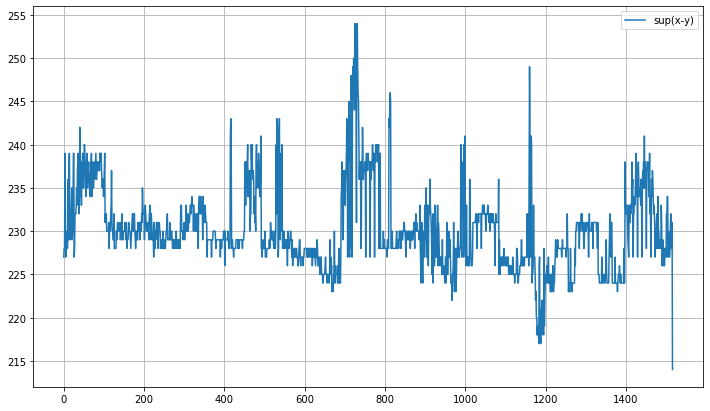

In [8]:
#строим весь график
import matplotlib.pyplot as plt

x = []
for i in range(0, 1517):
    x.append(i)
plt.figure(figsize=(12, 7))
plt.plot(x, sup, label="sup(x-y)")
plt.legend()
plt.grid(True)

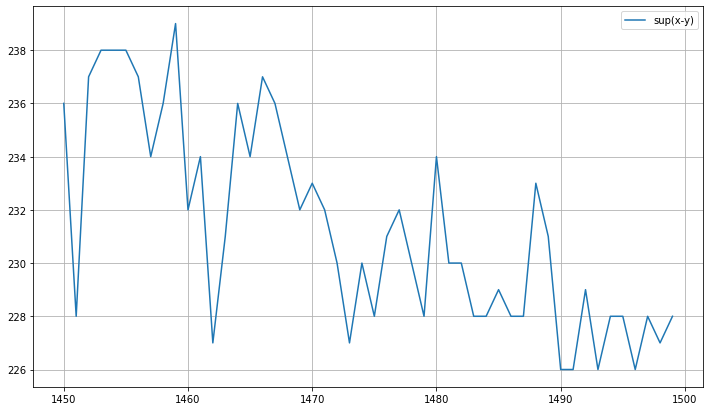

In [9]:
# масштабируем
x_temp = []
y_temp = []
for i in range(1450, 1500):
    x_temp.append(x[i])
    y_temp.append(sup[i])
plt.figure(figsize=(12, 7))
plt.plot(x_temp, y_temp, label="sup(x-y)")
plt.legend()
plt.grid(True)

In [10]:
print(sup[1482])
print(sup[1481])
print(sup[1483])

230
230
228


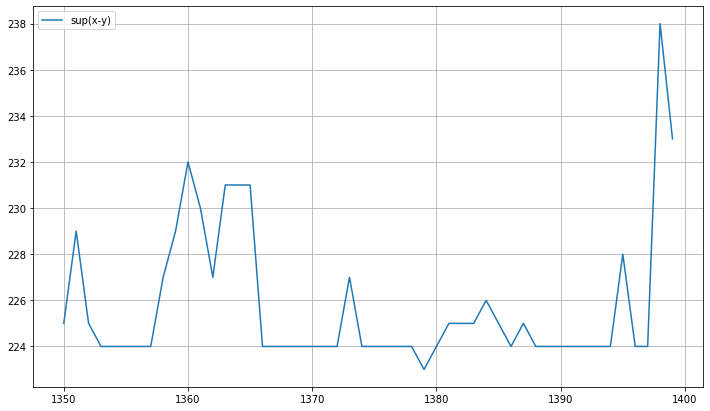

In [26]:
x_temp = []
y_temp = []
for i in range(1350, 1400):
    x_temp.append(x[i])
    y_temp.append(sup[i])
plt.figure(figsize=(12, 7))
plt.plot(x_temp, y_temp, label="sup(x-y)")
plt.legend()
plt.grid(True)